<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/dahnag_show_and_tell_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Dahna Galvez

**Date Created**: August 16, 2020

**Last Updated**: August 17, 2020

**Description**: This notebook contains applications of Week 2 lessons on the Customs dataset: Change in the number of quantities of the top imported goods in 2012 after a few years

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Check if mount is successful
!ls drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

boc_lite_2012_2019_top9_hscode.csv  boc_lite_2014.csv  boc_lite_2017.csv
boc_lite_2012.csv		    boc_lite_2015.csv  boc_lite_2018.csv
boc_lite_2013.csv		    boc_lite_2016.csv  boc_lite_2019.csv


In [ ]:
#Change work directory
%cd drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

/content/drive/.shortcut-targets-by-id/1pfxnf06OodnUo3H4NgkxVN6pA2FI9hh_/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv


# Walkthrough

1. Import modules
2. Prepare datasets (i.e. reading and setting up .csv files)
3. Find out content of datasets
4. Manipulate dataframes
5. Merge dataframes
6. Visualizing data
7. Drawing conclusions from data

*1. Import modules*

In [ ]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

*2. Prepare datasets*

In [ ]:
#Read .csv files
#Unable to read multiple data files simultaneously due to UnicodeDecodeError 
df_2012 = pd.read_csv('boc_lite_2012.csv')
df_2013 = pd.read_csv('boc_lite_2013.csv', encoding="latin-1")
df_2014 = pd.read_csv('boc_lite_2014.csv', encoding="latin-1")
df_2015 = pd.read_csv('boc_lite_2015.csv', encoding="latin-1")
df_2016 = pd.read_csv('boc_lite_2016.csv', encoding="latin-1")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*3. Find out content of datasets*

In [ ]:
print(df_2012.info())
print(df_2012.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193628 entries, 0 to 1193627
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   uid                   1193628 non-null  object 
 1   ty                    1193628 non-null  int64  
 2   tq                    1193628 non-null  object 
 3   tm                    0 non-null        float64
 4   entry                 1193628 non-null  object 
 5   hscode                1193628 non-null  int64  
 6   goodsdescription      1193626 non-null  object 
 7   p                     1193628 non-null  float64
 8   q                     1193628 non-null  float64
 9   m_fob                 1193628 non-null  float64
 10  m_cif                 1193628 non-null  float64
 11  fx_usd                1193628 non-null  float64
 12  dutiablevalueforeign  1193628 non-null  float64
 13  exchangerate          1193628 non-null  float64
 14  currency              1193628 non-

In [ ]:
df_2012.set_index(['exchangerate', 'currency', 'countryorigin_iso3'])
df_2012.reset_index()

,index,uid,ty,tq,tm,entry,hscode,goodsdescription,p,q,m_fob,m_cif,fx_usd,dutiablevalueforeign,exchangerate,currency,dutiablevaluephp,dutypaid,exciseadvalorem,arrastre,wharfage,vatbase,vatpaid,othertax,finesandpenalties,dutiestaxes,prefcode,countryorigin_iso3,countryexport_iso3,subport,port
0,0,2012q1 00000001,2012,2012q1,NaN,C,15119090000,PALM OLEIN IN BULK,0.973596,2499867.0,2433859.800,2486856.300,1.0,2486856.15,43.921000,USD,109225209,0,0,274985,NaN,112934962,13552195,NaN,NaN,13552195,AFTA,MYS,MYS,NaN,NaN
1,1,2012q1 00000002,2012,2012q1,NaN,C,27111900000,LIQUIFIED PETROLEUM GAS,0.915000,820000.0,750300.000,750300.000,1.0,750300.00,44.023000,USD,33030457,0,0,6560,NaN,33099646,3971957,NaN,NaN,3971957,NaN,CHN,CHN,NaN,NaN
2,2,2012q1 00000003,2012,2012q1,NaN,C,15119090000,COPRA IN BULK,0.964095,2499831.0,2410073.500,2410073.500,1.0,2410073.54,42.193000,USD,101688233,0,0,274981,NaN,109299809,13115977,NaN,NaN,13115977,AFTA,MYS,MYS,NaN,NaN
3,3,2012q1 00000004,2012,2012q1,NaN,C,15119090000,PALM OLEIN IN BULK,0.996198,2499948.0,2490444.000,2561692.500,1.0,2561692.59,42.687000,USD,109350971,0,0,274994,NaN,113043254,13565190,NaN,NaN,13565190,AFTA,MYS,MYS,NaN,NaN
4,4,2012q1 00000005,2012,2012q1,NaN,C,12030000000,COPRA IN BULK,0.639000,120460.0,76973.938,76973.938,1.0,76973.94,43.928000,USD,3381311,361800,0,13251,NaN,4006940,480832,NaN,NaN,0,NaN,AUS,AUS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193623,1193623,2012q4 00312929,2012,2012q4,NaN,C,27011900000,INDONESIAN STEAM COAL,0.083500,67888000.0,5668648.000,6608218.000,1.0,6608217.92,41.090000,USD,271498633,0,678880,543104,NaN,274310692,32917283,NaN,NaN,33596163,AFTA,IDN,IDN,NaN,NaN
1193624,1193624,2012q4 00312930,2012,2012q4,NaN,C,27011100000,DONALDSON COAL,0.081980,67104000.0,5501192.500,6746636.000,1.0,6746636.16,41.090000,USD,277185546,0,671040,536832,NaN,279975895,33597107,NaN,NaN,34268147,ANFTA,AUS,AUS,NaN,NaN
1193625,1193625,2012q4 00312931,2012,2012q4,NaN,C,27011290000,PINANG COAL,0.087030,69551000.0,6053023.500,6570145.500,1.0,6570145.65,40.919998,USD,268817509,0,695510,556408,NaN,271686285,32602354,NaN,NaN,33297864,AFTA,IDN,IDN,NaN,NaN
1193626,1193626,2012q4 00312932,2012,2012q4,NaN,C,27011100000,DONALDSON COAL,0.084726,68935000.0,5840612.000,7120985.500,1.0,7120985.50,41.060001,USD,292373422,0,689350,551480,NaN,295249267,35429912,NaN,NaN,36119262,ANFTA,AUS,AUS,NaN,NaN


*4. Manipulate DataFrames*

In [ ]:
#Group column goodsdescription and get sum of the corresponding values in column q
#Sort to get the highest value of q
#Slice only the 5 goods
goods_2012 = df_2012.groupby('goodsdescription')['q'].sum()
goods_2012_sorted = goods_2012.sort_values(ascending=False)
goods_2012_sliced = goods_2012_sorted[0:5]
print(goods_2012_sliced)

goodsdescription
BETTER NORTHERN SPRING WHEAT    2.530006e+10
INDONESIAN STEAM COAL           1.857618e+09
SUBBITUMINOUS STEAM COAL        1.026883e+09
UPPER ZAKUM CRUDE OIL           1.014632e+09
ROTO SOUTH COAL                 9.939840e+08
Name: q, dtype: float64


In [324]:
#Extract the 5 goods from the series
list = ["BETTER NORTHERN SPRING WHEAT", "INDONESIAN STEAM COAL", 
        "SUBBITUMINOUS STEAM COAL", "UPPER ZAKUM CRUDE OIL", "ROTO SOUTH COAL"]
goods_2013_filtered = df_2013[df_2013['goodsdescription'].isin(list)]
goods_2013 = goods_2013_filtered.groupby('goodsdescription')['q'].sum()
goods_2013_sorted = goods_2013.sort_values(ascending=False)
goods_2013_sliced = goods_2013_sorted[0:5]
print(goods_2013_sliced)

goodsdescription
INDONESIAN STEAM COAL           2.988000e+09
ROTO SOUTH COAL                 1.002587e+09
UPPER ZAKUM CRUDE OIL           8.204570e+08
SUBBITUMINOUS STEAM COAL        4.515990e+08
BETTER NORTHERN SPRING WHEAT    1.079956e+07
Name: q, dtype: float64


In [325]:
goods_2014_filtered = df_2014[df_2014['goodsdescription'].isin(list)]
goods_2014 = goods_2014_filtered.groupby('goodsdescription')['q'].sum()
goods_2014_sorted = goods_2014.sort_values(ascending=False)
goods_2014_sliced = goods_2014_sorted[0:5]
print(goods_2013_sliced)

goodsdescription
INDONESIAN STEAM COAL           2.988000e+09
ROTO SOUTH COAL                 1.002587e+09
UPPER ZAKUM CRUDE OIL           8.204570e+08
SUBBITUMINOUS STEAM COAL        4.515990e+08
BETTER NORTHERN SPRING WHEAT    1.079956e+07
Name: q, dtype: float64


In [326]:
goods_2015_filtered = df_2015[df_2015['goodsdescription'].isin(list)]
goods_2015 = goods_2015_filtered.groupby('goodsdescription')['q'].sum()
goods_2015_sorted = goods_2015.sort_values(ascending=False)
goods_2015_sliced = goods_2015_sorted[0:5]
print(goods_2013_sliced)

goodsdescription
INDONESIAN STEAM COAL           2.988000e+09
ROTO SOUTH COAL                 1.002587e+09
UPPER ZAKUM CRUDE OIL           8.204570e+08
SUBBITUMINOUS STEAM COAL        4.515990e+08
BETTER NORTHERN SPRING WHEAT    1.079956e+07
Name: q, dtype: float64


*5. Merge DataFrames*

In [348]:
#Combine series
grouped = pd.concat([goods_2012_sliced, goods_2013, goods_2014, goods_2015], 
                    keys=[2012, 2013, 2014, 2015], axis=0)
print(grouped)

      goodsdescription            
2012  BETTER NORTHERN SPRING WHEAT    2.530006e+10
      INDONESIAN STEAM COAL           1.857618e+09
      SUBBITUMINOUS STEAM COAL        1.026883e+09
      UPPER ZAKUM CRUDE OIL           1.014632e+09
      ROTO SOUTH COAL                 9.939840e+08
2013  BETTER NORTHERN SPRING WHEAT    1.079956e+07
      INDONESIAN STEAM COAL           2.988000e+09
      ROTO SOUTH COAL                 1.002587e+09
      SUBBITUMINOUS STEAM COAL        4.515990e+08
      UPPER ZAKUM CRUDE OIL           8.204570e+08
2014  BETTER NORTHERN SPRING WHEAT    1.867056e+08
      INDONESIAN STEAM COAL           1.750631e+09
      ROTO SOUTH COAL                 1.071965e+09
      SUBBITUMINOUS STEAM COAL        3.741820e+08
      UPPER ZAKUM CRUDE OIL           5.410864e+08
2015  BETTER NORTHERN SPRING WHEAT    1.420294e+08
      INDONESIAN STEAM COAL           1.676418e+09
      ROTO SOUTH COAL                 1.013350e+09
      SUBBITUMINOUS STEAM COAL        1.129319e

In [329]:
#Transform series to DataFrame
grouped_new = grouped.to_frame().reset_index()
print(grouped_new)
grouped_date = grouped_new.set_index('level_0')
print(grouped_date)

    level_0              goodsdescription             q
0      2012  BETTER NORTHERN SPRING WHEAT  2.530006e+10
1      2012         INDONESIAN STEAM COAL  1.857618e+09
2      2012      SUBBITUMINOUS STEAM COAL  1.026883e+09
3      2012         UPPER ZAKUM CRUDE OIL  1.014632e+09
4      2012               ROTO SOUTH COAL  9.939840e+08
5      2013  BETTER NORTHERN SPRING WHEAT  1.079956e+07
6      2013         INDONESIAN STEAM COAL  2.988000e+09
7      2013               ROTO SOUTH COAL  1.002587e+09
8      2013      SUBBITUMINOUS STEAM COAL  4.515990e+08
9      2013         UPPER ZAKUM CRUDE OIL  8.204570e+08
10     2014  BETTER NORTHERN SPRING WHEAT  1.867056e+08
11     2014         INDONESIAN STEAM COAL  1.750631e+09
12     2014               ROTO SOUTH COAL  1.071965e+09
13     2014      SUBBITUMINOUS STEAM COAL  3.741820e+08
14     2014         UPPER ZAKUM CRUDE OIL  5.410864e+08
15     2015  BETTER NORTHERN SPRING WHEAT  1.420294e+08
16     2015         INDONESIAN STEAM COAL  1.676

In [330]:
pivoted = grouped_date.pivot(values='q', columns='goodsdescription')
print(pivoted)

goodsdescription  BETTER NORTHERN SPRING WHEAT  ...  UPPER ZAKUM CRUDE OIL
level_0                                         ...                       
2012                              2.530006e+10  ...           1.014632e+09
2013                              1.079956e+07  ...           8.204570e+08
2014                              1.867056e+08  ...           5.410864e+08
2015                              1.420294e+08  ...           7.400710e+08

[4 rows x 5 columns]


*6. Visualizing data*

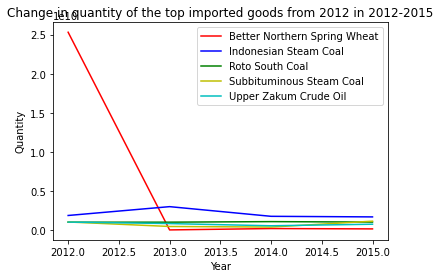

In [349]:
fig, ax = plt.subplots()
ax.plot(pivoted.index, pivoted['BETTER NORTHERN SPRING WHEAT'], color='r', 
        label='Better Northern Spring Wheat')
ax.plot(pivoted.index, pivoted['INDONESIAN STEAM COAL'],color='b', 
        label="Indonesian Steam Coal")
ax.plot(pivoted.index, pivoted['ROTO SOUTH COAL'],color='g', 
        label="Roto South Coal")
ax.plot(pivoted.index, pivoted['SUBBITUMINOUS STEAM COAL'], color='y', 
        label="Subbituminous Steam Coal")
ax.plot(pivoted.index, pivoted['UPPER ZAKUM CRUDE OIL'], color='c', 
        label="Upper Zakum Crude Oil")
ax.set_xlabel('Year')
ax.set_ylabel('Quantity')
ax.set_title('Change in quantity of the top imported goods from 2012 in 2012-2015')

plt.legend()
plt.show()